In [19]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.interpolate as interpolate
import scipy.io as scio
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.colors as colors
import colorcet as cc
import pickle
import scipy.optimize as optimize
import pandas as pd
from parse import *
# plt.style.use("/mnt/c/Users/billj/voltage_traces.mplstyle")
plt.style.use("/n/home11/bjia/bio_publications.mplstyle")

In [20]:
rootdir = "/n/holyscratch01/cohen_lab/bjia/20220917_0D_MorrisLecar/"
rootdir2 = "/n/holyscratch01/cohen_lab/bjia/20220924_0D_MorrisLecar_v3/"
cm_string = "cet_CET_R1"

In [21]:
figdir = "/n/cohen_lab/Lab/Papers/2022 First Heartbeat/Figures/"

In [22]:
bifurcations = ["snic", "saddle_node", "supercritical_hopf", "subcritical_hopf"]

In [5]:
all_data = []
for bif in bifurcations:
    print(bif)
    datadir = os.path.join(rootdir, bif)
    for file in os.listdir(datadir):
        params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bif,  file)
        if params is not None:
            try:
                res = np.load(os.path.join(datadir, file))
            except Exception as e:
                print(file)
                continue
            all_data.append((bif, params['I'], params['sigma'], res['isi_mu'], res['isi_std'], \
                             res['isi_std']/res['isi_mu'], res['f'], res['n_peaks']))
all_data = pd.DataFrame(all_data, columns = ["bifurcation", "I", "sigma", "isi_mu", "isi_std", "isi_cv", "freq", "n_peaks"])

snic


/tmp/ipykernel_18105/3110829748.py:14: RuntimeWarning: invalid value encountered in true_divide
  res['isi_std']/res['isi_mu'], res['f'], res['n_peaks']))
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18105/3110829748.py", line 9, in <module>
    res = np.load(os.path.join(datadir, file))
  File "/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/numpy/lib/npyio.py", line 424, in load
    magic = fid.read(N)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/n/home11/bjia/.conda/envs/bjia2/lib/python3.9/site-pa

TypeError: object of type 'NoneType' has no len()

In [ ]:
all_data.to_csv(os.path.join(rootdir, "all_data.csv"), index=False)

In [ ]:
new_pkd = []
rootdir2 = "/n/holyscratch01/cohen_lab/bjia/20220924_0D_MorrisLecar_v3/"
for bif in ["snic", "saddle_node", "supercritical_hopf", "subcritical_hopf"]:
    datadir = os.path.join(rootdir2, bif)
    for file in os.listdir(datadir):
        params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bif,  file)
        if params is not None:
            try:
                res = np.load(os.path.join(datadir, file))
            except Exception as e:
                print(file)
                continue
            new_pkd.append((bif, params['I'], params['sigma'], res['isi_mu'], res['isi_std'], \
                             res['isi_std']/res['isi_mu'], res['f'], res['n_peaks'], res['t_total'], file))
new_pkd = pd.DataFrame(new_pkd, columns = ["bifurcation", "I", "sigma", "isi_mu", "isi_std", "isi_cv", "freq", "n_peaks",\
                                           "t_total", "file_name"])

In [16]:
subcrit_2 = []
rootdir2 = "/n/holyscratch01/cohen_lab/bjia/20220924_0D_MorrisLecar_v3/"
folders =  ["snic", "saddle_node", "supercritical_hopf", "subcritical_hopf2"]
for idx, bif in list(enumerate(["snic", "saddle_node", "supercritical_hopf", "subcritical_hopf"])):
    datadir = os.path.join(rootdir2, folders[idx])
    for file in os.listdir(datadir):
        params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bif,  file)
        if params is not None:
            try:
                res = np.load(os.path.join(datadir, file))
            except Exception as e:
                print(file)
                continue
            subcrit_2.append((bif, params['I'], params['sigma'], res['isi_mu'], res['isi_std'], \
                             res['isi_std']/res['isi_mu'], res['f'], res['n_peaks'], res['t_total'], file, folders[idx]))
subcrit_2 = pd.DataFrame(subcrit_2, columns = ["bifurcation", "I", "sigma", "isi_mu", "isi_std", "isi_cv", "freq", "n_peaks",\
                                           "t_total", "file_name", "folder"])

/tmp/ipykernel_60748/1097665543.py:15: RuntimeWarning: invalid value encountered in true_divide
  res['isi_std']/res['isi_mu'], res['f'], res['n_peaks'], res['t_total'], file, folders[idx]))


In [17]:
subcrit_2 = subcrit_2.set_index("bifurcation")
subcrit_2 = subcrit_2[~((subcrit_2.index =="saddle_node") & (subcrit_2["I"] > 10))]
subcrit_2.reset_index().to_csv(os.path.join(rootdir2, "subcritical_hopf_stringent.csv"), index=False)

In [14]:
# subcrit_2 = subcrit_2[~((subcrit_2.index =="saddle_node") & (subcrit_2["I"] > 10))]
# subcrit_2.reset_index().to_csv(os.path.join(rootdir2, "subcritical_hopf_stringent.csv"), index=False)

In [4]:
all_data = pd.read_csv(os.path.join(rootdir, "all_data.csv"))
all_data = all_data.set_index("bifurcation")

In [23]:
subcrit_2 = pd.read_csv(os.path.join(rootdir2, "subcritical_hopf_stringent.csv")).set_index("bifurcation")

Text(-0.02, 0.48, 'ISI CV')

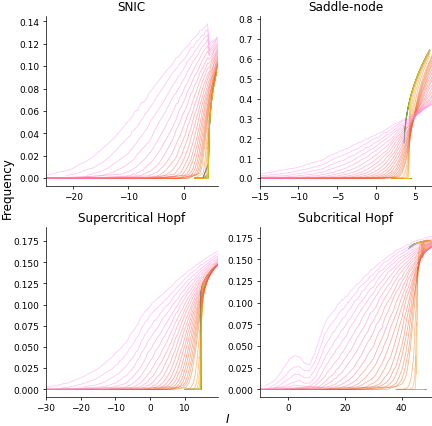

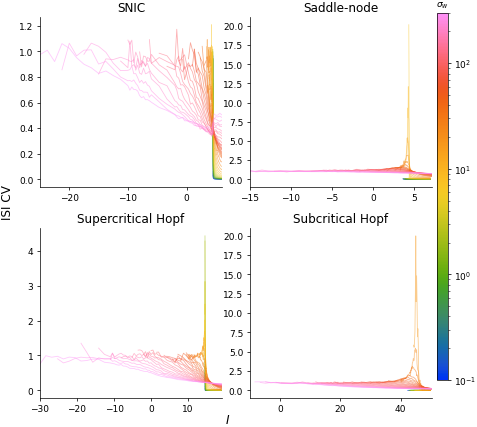

In [24]:
fig1, axes = plt.subplots(2,2, figsize=(6,6))
fig2, axes2 = plt.subplots(2,2, figsize=(6,6))
axes = axes.ravel()
axes2 = axes2.ravel()
titles = ["SNIC", "Saddle-node", "Supercritical Hopf", "Subcritical Hopf"]
subcrit_2_filtered = subcrit_2.copy()
subcrit_2_filtered = subcrit_2_filtered[(subcrit_2_filtered["n_peaks"]>100)|(subcrit_2_filtered["n_peaks"]==0)]
for idx, bif in enumerate(subcrit_2_filtered.index.unique()):
    bif_data = subcrit_2_filtered.loc[bif]
    f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
    covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)
        
    sigmas = f.index.to_numpy()
    Is = f.columns.to_numpy()
    cmap = cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string)

    for row in range(len(sigmas)):
#         axes[idx].scatter(Is, f.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
#         axes2[idx].scatter(Is, covs.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
        finite_mask = np.isfinite(f.iloc[row,:].values)
        if bif == "saddle_node":
            I_curr = Is[finite_mask]
            f_curr = f.iloc[row].values[finite_mask]
            cov_curr = covs.iloc[row].values[finite_mask]
            max_diff = np.max(np.diff(f_curr)/np.diff(I_curr))
            if max_diff > 3:
                axes[idx].plot(I_curr[f_curr == 0], f_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr == 0], cov_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)

                axes[idx].plot(I_curr[f_curr > 0.15], f_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr > 0.15], cov_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            else:
                axes[idx].plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(Is[finite_mask], covs.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)                
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)
        elif bif == "subcritical_hopf":
            I_curr = Is[finite_mask]
            f_curr = f.iloc[row].values[finite_mask]
            cov_curr = covs.iloc[row].values[finite_mask]
            max_diff = np.max(np.diff(f_curr)/np.diff(I_curr))
            if max_diff > 0.64:
                axes[idx].plot(I_curr[f_curr == 0], f_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr == 0], cov_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)

                axes[idx].plot(I_curr[f_curr > 0.15], f_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr > 0.15], cov_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            else:
                axes[idx].plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(Is[finite_mask], covs.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)                
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)
        else:
            axes[idx].plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            axes2[idx].plot(Is[finite_mask], covs.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            axes[idx].set_xlim(np.min(Is), None)
            axes2[idx].set_xlim(np.min(Is), None)
    axes[idx].set_title(titles[idx])
    axes2[idx].set_title(titles[idx])
#     axes[1].set_ylim(-0.05, 1.2)
#     fig1.suptitle(bif)
#     fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
fig2.tight_layout()
plt.figure(fig2.number)

cax = plt.axes([0.99, 0.1, 0.025, 0.85])
cb1 = fig2.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), cax=cax)
cax.set_title(r"$\sigma_w$", fontsize=9)
# axes[3].set_xlim(37,51)
# axes2[3].set_xlim(37,51)
# axes2[0].set_ylim(None, 2)
# axes2[1].set_ylim(*axes2[0].get_ylim())
# axes[1].set_xlim(None, 5)
# axes2[1].set_xlim(None, 5)
# axes[2].set_xticks([0,5,10,15])
# axes2[2].set_xticks([0,5,10,15])
# axes2[2].set_ylim(-0.1, 2)
# axes2[3].set_ylim(-0.1, 2)
# axes2[2].set_xlim(10, None)
# axes[2].set_xlim(10, None)

fig1.tight_layout()
fig2.text(0.5, 0, r"$I$", fontsize=12)
fig1.text(0.5, 0,  r"$I$", fontsize=12)
fig1.text(-0.02, 0.48, r"Frequency", rotation=90, fontsize=12)
fig2.text(-0.02, 0.48, r"ISI CV", rotation=90, fontsize=12)
# plt.figure(fig1.number)
# plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "frequencies.tif"), dpi=300)
# plt.figure(fig2.number)
# plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "CV.tif"), dpi=300)

In [25]:
bif_data = subcrit_2_filtered.loc["snic"]
f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)
        

In [30]:
f.loc[22.220123].index[np.argwhere(f.loc[22.220123].values > 0).ravel()[0]-1]

3.466667

/tmp/ipykernel_98146/2629841612.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(3,2))


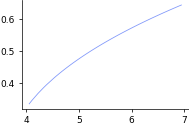

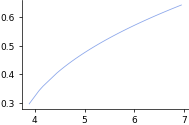

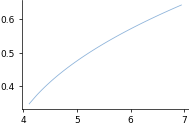

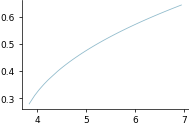

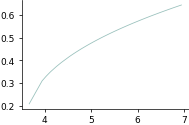

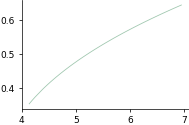

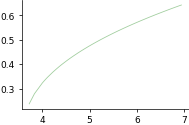

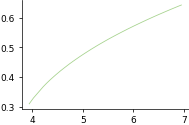

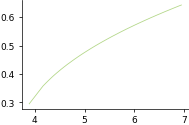

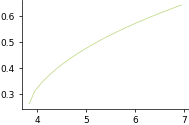

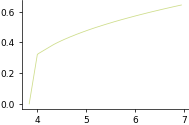

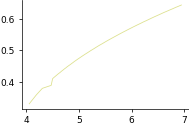

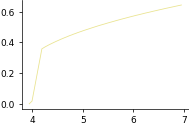

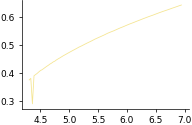

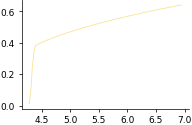

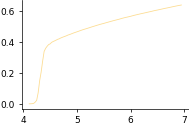

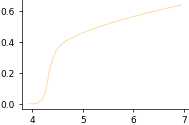

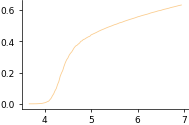

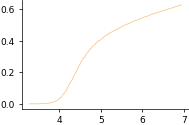

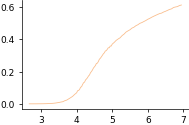

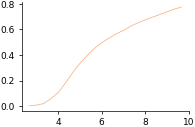

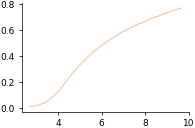

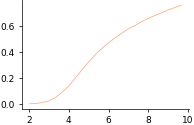

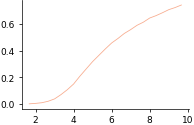

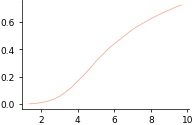

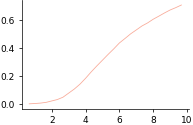

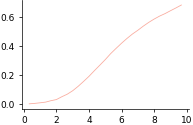

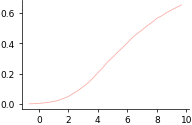

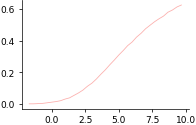

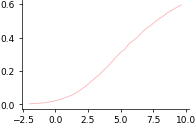

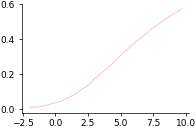

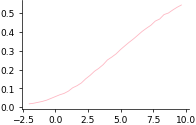

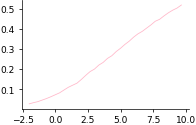

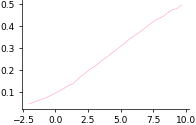

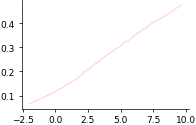

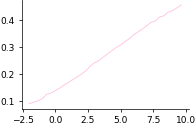

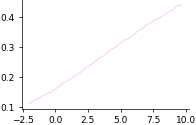

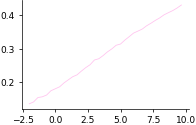

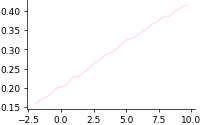

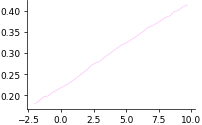

In [36]:
bif_data = subcrit_2_filtered.loc["saddle_node"]
f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)

sigmas = f.index.to_numpy()
Is = f.columns.to_numpy()
for row in range(len(sigmas)):
#         axes[idx].scatter(Is, f.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
#         axes2[idx].scatter(Is, covs.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
    finite_mask = np.isfinite(f.iloc[row,:].values)
#         if np.max(np.diff(f.iloc[row].values[finite_mask])/np.diff(Is[finite_mask])) > 1:
    fig1, ax1 = plt.subplots(figsize=(3,2))
    ax1.plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
#             axes2[idx].plot(Is[finite_mask], covs.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
#             axes[idx].set_xlim(np.min(Is), None)
#             axes2[idx].set_xlim(np.min(Is), None)

/tmp/ipykernel_98146/4025435743.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(3,2))


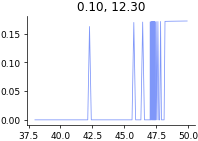

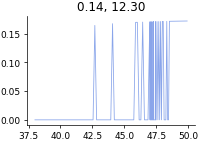

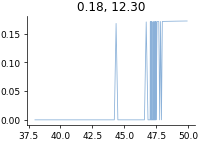

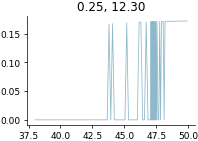

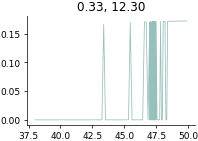

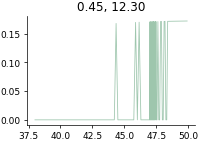

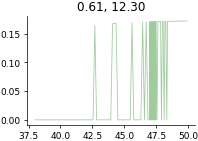

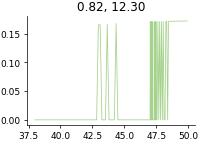

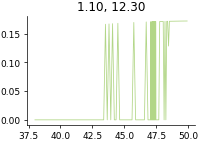

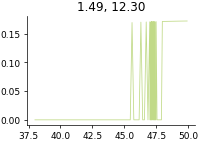

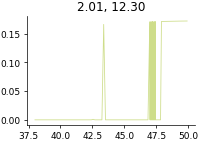

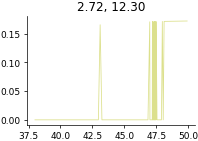

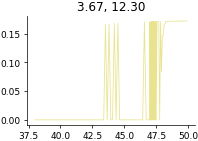

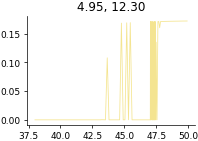

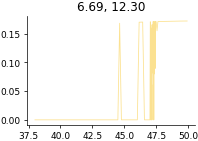

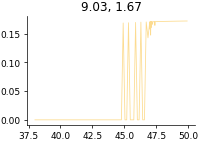

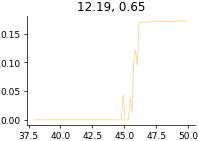

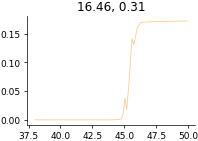

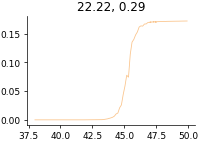

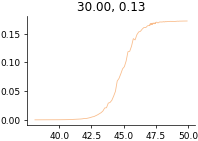

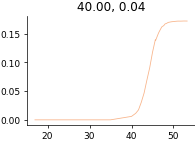

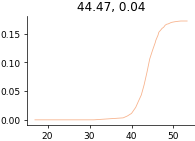

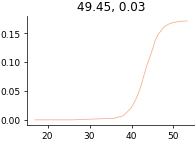

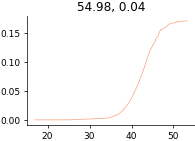

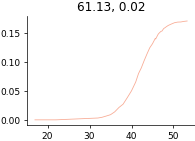

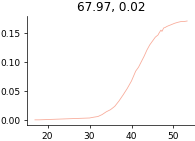

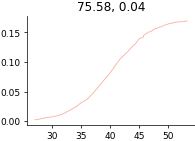

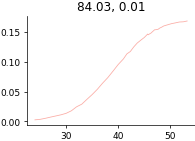

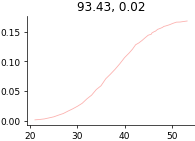

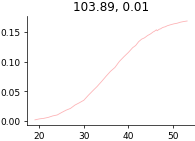

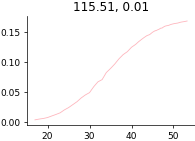

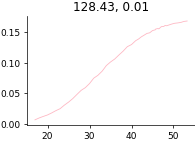

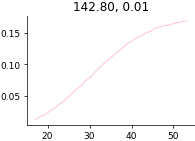

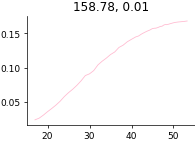

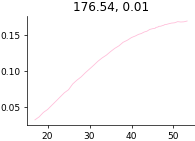

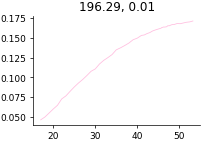

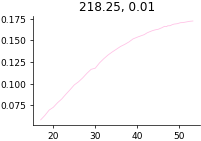

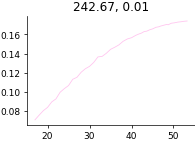

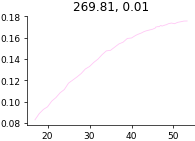

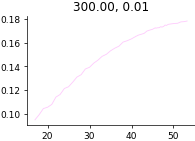

In [55]:
plt.close("all")
bif_data = subcrit_2_filtered.loc["subcritical_hopf"]
f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)

sigmas = f.index.to_numpy()
Is = f.columns.to_numpy()
for row in range(len(sigmas)):
#         axes[idx].scatter(Is, f.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
#         axes2[idx].scatter(Is, covs.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
    finite_mask = np.isfinite(f.iloc[row,:].values)
#     print(sigmas[row], np.max(np.diff(f.iloc[row].values[finite_mask])/np.diff(Is[finite_mask])))
    fig1, ax1 = plt.subplots(figsize=(3,2))
    ax1.plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
    ax1.set_title("%.2f, %.2f" %(sigmas[row], np.max(np.diff(f.iloc[row].values[finite_mask])/np.diff(Is[finite_mask]))))

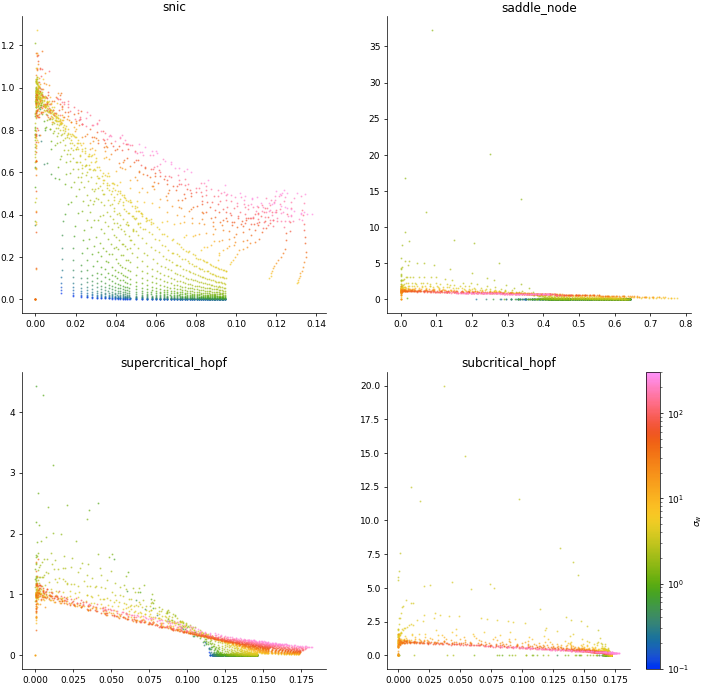

In [17]:
fig1, axes = plt.subplots(2,2, figsize=(12,12))
axes = axes.ravel()
for idx, bif in enumerate(subcrit_2.index.unique()):
    bif_data = subcrit_2.loc[bif]
    f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
    covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)
    sigmas = f.index.to_numpy()
    Is = f.columns.to_numpy()
    for row in range(len(sigmas)):
        axes[idx].scatter(f.iloc[row,:],covs.iloc[row,:], color=cmap(row/len(sigmas)),s=1,alpha=0.5)
    axes[idx].set_title(bif)
#     axes[idx].set_ylim(-0.05, 1.2)
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string),\
              label=r"$\sigma_w$",ax=axes[-1])


In [28]:
plt.cm.cet_CET_R1

AttributeError: module 'matplotlib.cm' has no attribute 'cet_CET_R1'

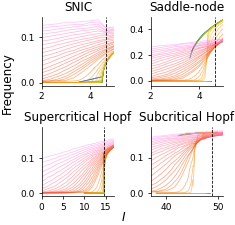

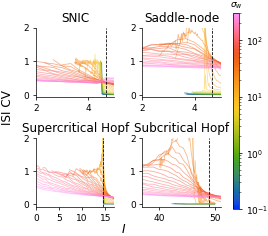

In [31]:
fig1, axes = plt.subplots(2,2, figsize=(3.2,3.2))
fig2, axes2 = plt.subplots(2,2, figsize=(3.2,3.2))
axes = axes.ravel()
axes2 = axes2.ravel()
titles = ["SNIC", "Saddle-node", "Supercritical Hopf", "Subcritical Hopf"]
for idx, bif in enumerate(subcrit_2_filtered.index.unique()):
    bif_data = subcrit_2_filtered.loc[bif]
    f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
    covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)
        
    sigmas = f.index.to_numpy()
    Is = f.columns.to_numpy()
    for row in range(len(sigmas)):
    #         axes[idx].scatter(Is, f.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
    #         axes2[idx].scatter(Is, covs.iloc[row,:], color=cmap(row/len(sigmas)),s=0.75,alpha=0.5)
        finite_mask = np.isfinite(f.iloc[row,:].values)
        if bif == "saddle_node":
            I_curr = Is[finite_mask]
            f_curr = f.iloc[row].values[finite_mask]
            cov_curr = covs.iloc[row].values[finite_mask]
            max_diff = np.max(np.diff(f_curr)/np.diff(I_curr))
            if max_diff > 3:
                axes[idx].plot(I_curr[f_curr == 0], f_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr == 0], cov_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)

                axes[idx].plot(I_curr[f_curr > 0.15], f_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr > 0.15], cov_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            else:
                axes[idx].plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(Is[finite_mask], covs.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)                
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)
        elif bif == "subcritical_hopf":
            I_curr = Is[finite_mask]
            f_curr = f.iloc[row].values[finite_mask]
            cov_curr = covs.iloc[row].values[finite_mask]
            max_diff = np.max(np.diff(f_curr)/np.diff(I_curr))
            if max_diff > 0.64:
                axes[idx].plot(I_curr[f_curr == 0], f_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr == 0], cov_curr[f_curr==0], color=cmap.to_rgba(sigmas[row]),alpha=0.5)

                axes[idx].plot(I_curr[f_curr > 0.15], f_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(I_curr[f_curr > 0.15], cov_curr[f_curr > 0.15], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            else:
                axes[idx].plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes2[idx].plot(Is[finite_mask], covs.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)                
                axes[idx].set_xlim(np.min(Is), None)
                axes2[idx].set_xlim(np.min(Is), None)
        else:
            axes[idx].plot(Is[finite_mask], f.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            axes2[idx].plot(Is[finite_mask], covs.iloc[row].values[finite_mask], color=cmap.to_rgba(sigmas[row]),alpha=0.5)
            axes[idx].set_xlim(np.min(Is), None)
            axes2[idx].set_xlim(np.min(Is), None)
    axes[idx].set_title(titles[idx])
    axes2[idx].set_title(titles[idx])
#     axes[1].set_ylim(-0.05, 1.2)
#     fig1.suptitle(bif)
#     fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
fig2.tight_layout()
plt.figure(fig2.number)

cax = plt.axes([0.99, 0.1, 0.025, 0.85])
cb1 = fig2.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), cax=cax)
cax.set_title(r"$\sigma_w$", fontsize=9)

axes2[0].set_ylim(None, 2)
axes[0].set_xlim(2, 5)
axes2[0].set_xlim(2, 5)

axes[3].set_xlim(37,51)
axes2[3].set_xlim(37,51)
axes2[3].set_ylim(-0.1, 2)

axes2[1].set_ylim(*axes2[0].get_ylim())
axes[1].set_xlim(2, 5)
axes[1].set_ylim(axes[1].get_ylim()[0], 0.5)
axes2[1].set_xlim(2, 5)


axes2[2].set_xlim(12, 17)
axes[2].set_xlim(12, 17)
axes[2].set_xticks([0,5,10,15])
axes2[2].set_xticks([0,5,10,15])
axes2[2].set_ylim(-0.1, 2)

axes[0].axvline(4.68, color="k", linestyle="--")
axes2[0].axvline(4.68, color="k", linestyle="--")

axes[1].axvline(4.68, color="k", linestyle="--")
axes2[1].axvline(4.68, color="k", linestyle="--")

axes[2].axvline(14.61, color="k", linestyle="--")
axes2[2].axvline(14.61, color="k", linestyle="--")

axes[3].axvline(48.91, color="k", linestyle="--")
axes2[3].axvline(48.91, color="k", linestyle="--")

fig1.tight_layout()
fig2.text(0.5, 0, r"$I$", fontsize=12)
fig1.text(0.5, 0,  r"$I$", fontsize=12)
fig1.text(-0.02, 0.48, r"Frequency", rotation=90, fontsize=12)
fig2.text(-0.02, 0.48, r"ISI CV", rotation=90, fontsize=12)
plt.figure(fig1.number)
# plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "frequencies.tif"), dpi=300)
plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "frequencies.svg"), dpi=300)

plt.figure(fig2.number)
# plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "CV.tif"), dpi=300)
plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "CV.svg"), dpi=300)


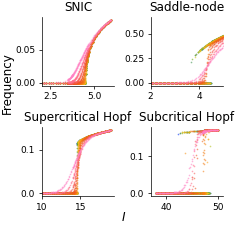

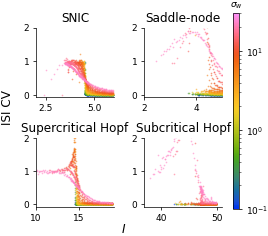

In [7]:
fig1, axes = plt.subplots(2,2, figsize=(3.2,3.2))
fig2, axes2 = plt.subplots(2,2, figsize=(3.2,3.2))
axes = axes.ravel()
axes2 = axes2.ravel()
titles = ["SNIC", "Saddle-node", "Supercritical Hopf", "Subcritical Hopf"]

for idx, bif in enumerate(subcrit_2.index.unique()):
    bif_data = subcrit_2.loc[bif]
    f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
    covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)
    sigmas = f.index.to_numpy()
    Is = f.columns.to_numpy()
    for row in range(len(sigmas)):
        axes[idx].scatter(Is, f.iloc[row,:], color=cmap(row/len(sigmas)),s=0.5,alpha=0.5)
        axes2[idx].scatter(Is, covs.iloc[row,:], color=cmap(row/len(sigmas)),s=0.5,alpha=0.5)
        axes[idx].set_xlim(np.min(Is), None)
        axes2[idx].set_xlim(np.min(Is), None)
    axes[idx].set_title(titles[idx])
    axes2[idx].set_title(titles[idx])
#     axes[1].set_ylim(-0.05, 1.2)
#     fig1.suptitle(bif)
#     fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
fig2.tight_layout()
plt.figure(fig2.number)

cax = plt.axes([0.99, 0.1, 0.025, 0.85])
cb1 = fig2.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), cax=cax)
cax.set_title(r"$\sigma_w$", fontsize=9)
axes[3].set_xlim(37,51)
axes2[3].set_xlim(37,51)
axes2[0].set_ylim(None, 2)
axes2[1].set_ylim(*axes2[0].get_ylim())
axes[1].set_xlim(None, 5)
axes2[1].set_xlim(None, 5)
axes[2].set_xticks([0,5,10,15])
axes2[2].set_xticks([0,5,10,15])
axes2[2].set_ylim(-0.1, 2)
axes2[3].set_ylim(-0.1, 2)
axes2[2].set_xlim(10, None)
axes[2].set_xlim(10, None)

fig1.tight_layout()
fig2.text(0.5, 0, r"$I$", fontsize=12)
fig1.text(0.5, 0,  r"$I$", fontsize=12)
fig1.text(-0.02, 0.48, r"Frequency", rotation=90, fontsize=12)
fig2.text(-0.02, 0.48, r"ISI CV", rotation=90, fontsize=12)
plt.figure(fig1.number)
plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "frequencies.tif"), dpi=300)
plt.figure(fig2.number)
plt.savefig(os.path.join(figdir, "Supplementary Figures", "MorrisLecar_Single", "CV.tif"), dpi=300)

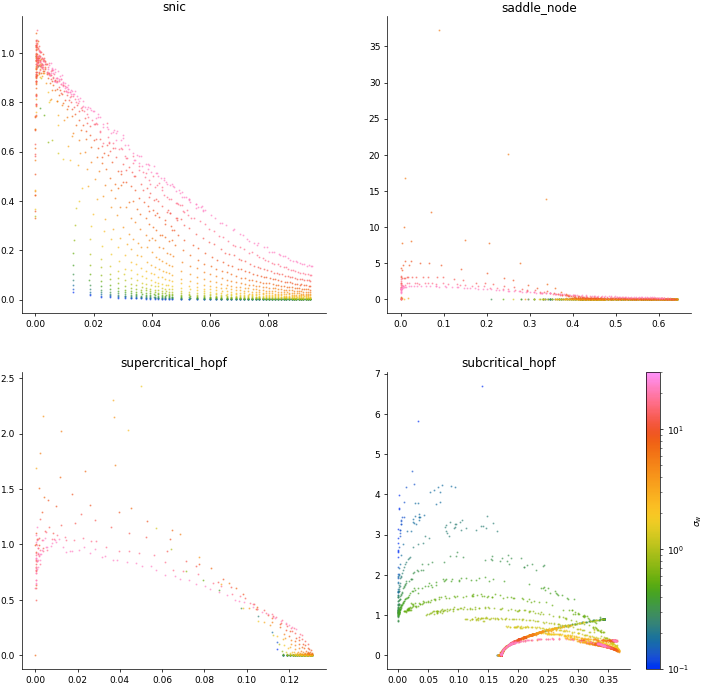

In [11]:
fig1, axes = plt.subplots(2,2, figsize=(12,12))
axes = axes.ravel()
for idx, bif in enumerate(new_pkd.index.unique()):
    bif_data = new_pkd.loc[bif]
    f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"], dropna=False)
    covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"], dropna=False)
    sigmas = f.index.to_numpy()
    Is = f.columns.to_numpy()
    for row in range(len(sigmas)):
        axes[idx].scatter(f.iloc[row,:],covs.iloc[row,:], color=cmap(row/len(sigmas)),s=1,alpha=0.5)
    axes[idx].set_title(bif)
#     axes[idx].set_ylim(-0.05, 1.2)
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string),\
              label=r"$\sigma_w$",ax=axes[-1])


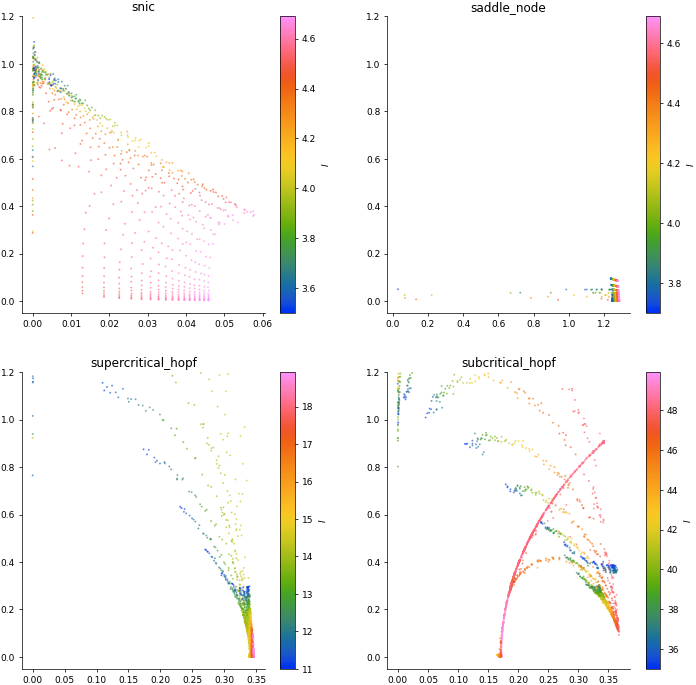

In [20]:
fig1, axes = plt.subplots(2,2, figsize=(12,12))
axes = axes.ravel()
for idx, bif in enumerate(new_pkd.index.unique()):
    bif_data = new_pkd.loc[bif]
    f = pd.pivot_table(bif_data, values="freq", index="sigma", columns=["I"])
    covs = pd.pivot_table(bif_data, values="isi_cv", index="sigma", columns=["I"])
    sigmas = f.index.to_numpy()
    Is = f.columns.to_numpy()
    I_normed = (Is - Is.min())/(Is.max()-Is.min())
    for row in range(len(sigmas)):
        axes[idx].scatter(f.iloc[row,:],covs.iloc[row,:], color=cmap(I_normed),s=1,alpha=0.5)
    axes[idx].set_title(bif)
    axes[idx].set_ylim(-0.05, 1.2)
    fig1.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=Is.min(), vmax=Is.max()), cmap=cm_string),\
                  label=r"$I$",ax=axes[idx])

Text(0.5, 1.0, 'SNIC')

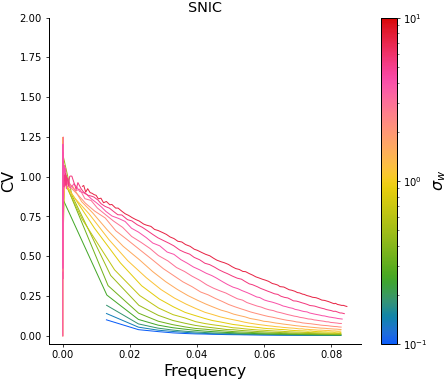

In [17]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
#     ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
    ax1.plot(f[row,:], covs[row,:], color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("SNIC")

Text(0.5, 1.0, 'SNIC')

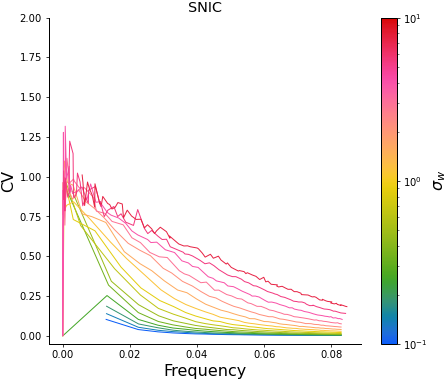

In [85]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
#     ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
    ax1.plot(f[row,:], covs[row,:], color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("SNIC")

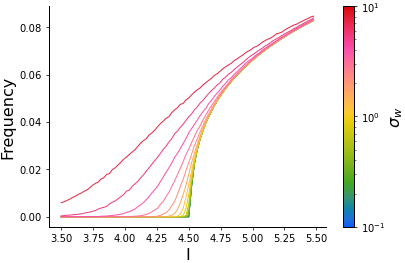

In [11]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, f[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 0.7)
ax1.set_xlabel("I")
ax1.set_ylabel("Frequency")
plt.tight_layout()
# plt.savefig("frequency_vs_i.svg")

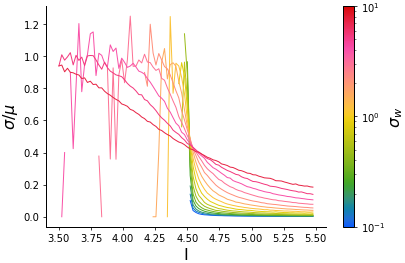

In [18]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, covs[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 1.3)
ax1.set_xlabel("I")
ax1.set_ylabel(r"$\sigma/\mu$")
plt.tight_layout()

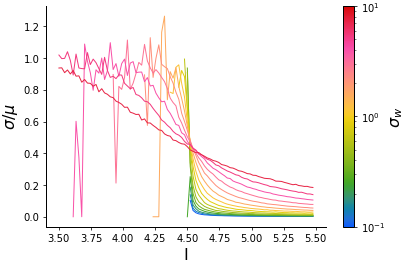

In [12]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, covs[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 1.3)
ax1.set_xlabel("I")
ax1.set_ylabel(r"$\sigma/\mu$")
plt.tight_layout()

In [54]:
bifurcation = "saddle_node"
datadir = os.path.join(rootdir, bifurcation)
sigmas = set([])
Is = set([])
for f in os.listdir(datadir):
    res = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, f)
    if res is not None:
        sigmas.add(res['sigma'])
        Is.add(res['I'])
sigmas = np.sort(np.array(list(sigmas)))
Is = np.sort(np.array(list(Is)))
isi_mu = np.ones((len(sigmas),len(Is)))*np.nan
isi_std = np.ones((len(sigmas),len(Is)))*np.nan
f = np.zeros((len(sigmas),len(Is)))
for file in os.listdir(datadir):
    params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, file)
    if params is not None:
        try:
            res = np.load(os.path.join(datadir, file))
        except Exception as e:
            print(file)
            continue
        row = np.argwhere(sigmas==params['sigma'])[0][0]
        col = np.argwhere(Is==params['I'])[0][0]
        isi_mu[row, col] = res['isi_mu']
        isi_std[row, col] = res['isi_std']
        f[row, col] = res['f']
f[np.isnan(isi_mu)] = np.nan
np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)

/tmp/ipykernel_54044/1936385279.py:29: RuntimeWarning: invalid value encountered in true_divide
  np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)


In [3]:
bifurcation = "saddle_node"
datadir = os.path.join(rootdir, bifurcation)
results = np.load(os.path.join(datadir, "results.npz"))
Is = results["Is"]
sigmas = results["sigmas"]
f = results["freq"]
covs = results["isi_cv"]

Text(0.5, 1.0, 'Saddle-Node')

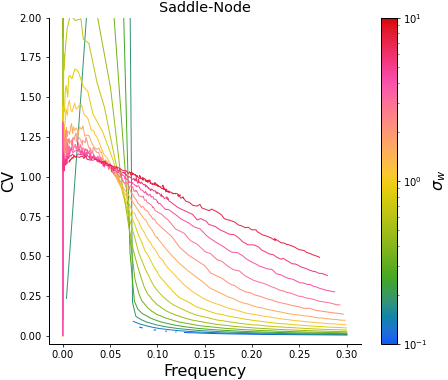

In [6]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
#     ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
    ax1.plot(f[row,:], covs[row,:], color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("Saddle-Node")

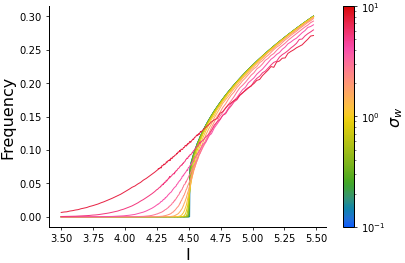

In [7]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, f[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 0.7)
ax1.set_xlabel("I")
ax1.set_ylabel("Frequency")
plt.tight_layout()

(4.25, 4.75)

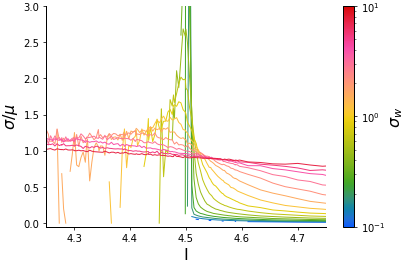

In [8]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, covs[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
ax1.set_ylim(-0.05, 3)
ax1.set_xlabel("I")
ax1.set_ylabel(r"$\sigma/\mu$")
plt.tight_layout()
ax1.set_xlim(4.25, 4.75)

In [25]:
bifurcation = "saddle_node"
datadir = os.path.join(rootdir, "saddle_node_fine")
sigmas = set([])
Is = set([])
for f in os.listdir(datadir):
    res = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, f)
    if res is not None:
        sigmas.add(res['sigma'])
        Is.add(res['I'])
sigmas = np.sort(np.array(list(sigmas)))
Is = np.sort(np.array(list(Is)))
isi_mu = np.ones((len(sigmas),len(Is)))*np.nan
isi_std = np.ones((len(sigmas),len(Is)))*np.nan
f = np.zeros((len(sigmas),len(Is)))
for file in os.listdir(datadir):
    params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, file)
    if params is not None:
        try:
            res = np.load(os.path.join(datadir, file))
        except Exception as e:
            print(file)
            continue
        row = np.argwhere(sigmas==params['sigma'])[0][0]
        col = np.argwhere(Is==params['I'])[0][0]
        isi_mu[row, col] = res['isi_mu']
        isi_std[row, col] = res['isi_std']
        f[row, col] = res['f']
f[np.isnan(isi_mu)] = np.nan
np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)

/tmp/ipykernel_31220/2187449890.py:29: RuntimeWarning: invalid value encountered in true_divide
  np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)


In [26]:
bifurcation = "saddle_node_fine"
datadir = os.path.join(rootdir, bifurcation)
results = np.load(os.path.join(datadir, "results.npz"))
Is = results["Is"]
sigmas = results["sigmas"]
f = results["freq"]
covs = results["isi_cv"]

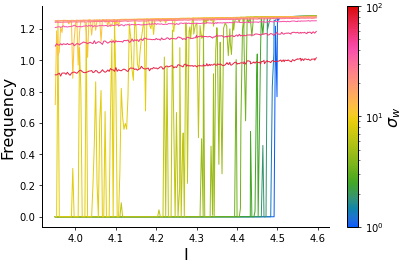

In [27]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, f[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 0.7)
ax1.set_xlabel("I")
ax1.set_ylabel("Frequency")
plt.tight_layout()

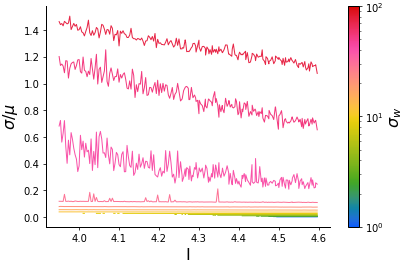

In [30]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, covs[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 3)
ax1.set_xlabel("I")
ax1.set_ylabel(r"$\sigma/\mu$")
plt.tight_layout()
# ax1.set_xlim(4.25, 4.75)

(0.0, 0.1)

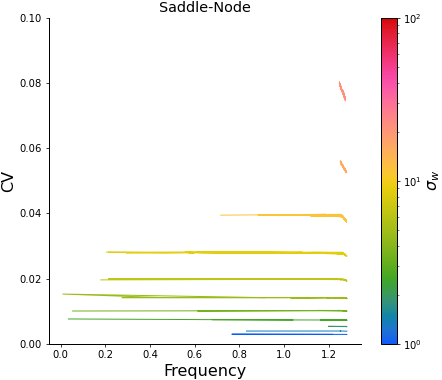

In [31]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
#     ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
    ax1.plot(f[row,:], covs[row,:], color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("Saddle-Node")
ax1.set_ylim((0, 0.1))

In [86]:
bifurcation = "supercritical_hopf"
datadir = os.path.join(rootdir, bifurcation)
sigmas = set([])
Is = set([])
for f in os.listdir(datadir):
    res = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, f)
    if res is not None:
        sigmas.add(res['sigma'])
        Is.add(res['I'])
sigmas = np.sort(np.array(list(sigmas)))
Is = np.sort(np.array(list(Is)))
isi_mu = np.zeros((len(sigmas),len(Is)))
isi_std = np.zeros((len(sigmas),len(Is)))
f = np.zeros((len(sigmas),len(Is)))
for file in os.listdir(datadir):
    params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, file)
    if params is not None:
        try:
            res = np.load(os.path.join(datadir, file))
        except Exception as e:
            print(file)
            continue
        row = np.argwhere(sigmas==params['sigma'])[0][0]
        col = np.argwhere(Is==params['I'])[0][0]
        isi_mu[row, col] = res['isi_mu']
        isi_std[row, col] = res['isi_std']
        f[row, col] = res['f']
np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)

/tmp/ipykernel_60946/3609766846.py:28: RuntimeWarning: invalid value encountered in true_divide
  np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)


In [87]:
bifurcation = "supercritical_hopf"
datadir = os.path.join(rootdir, bifurcation)
results = np.load(os.path.join(datadir, "results.npz"))
Is = results["Is"]
sigmas = results["sigmas"]
f = results["freq"]
covs = results["isi_cv"]

Text(0.5, 1.0, 'Supercritical Hopf')

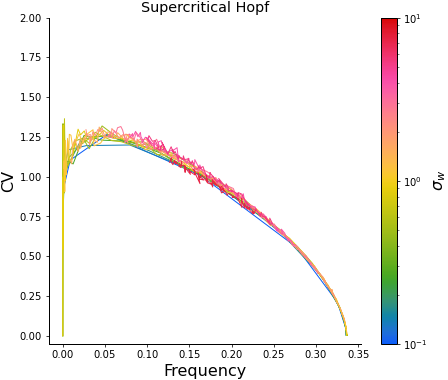

In [88]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
    ax1.plot(f[row,:], covs[row,:], color=cmap(row/len(sigmas)))
#     ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("Supercritical Hopf")

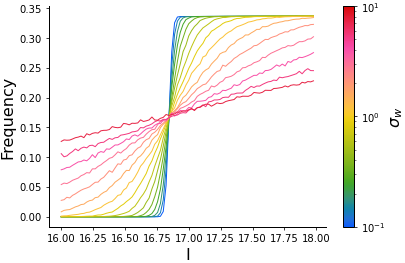

In [70]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, f[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 0.7)
ax1.set_xlabel("I")
ax1.set_ylabel("Frequency")
plt.tight_layout()

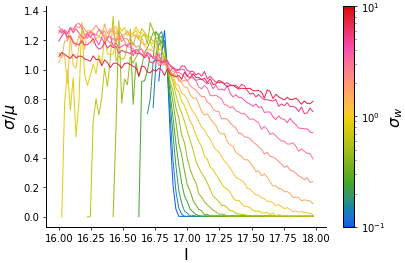

In [71]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, covs[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 1.3)
ax1.set_xlabel("I")
ax1.set_ylabel(r"$\sigma/\mu$")
plt.tight_layout()

In [72]:
bifurcation = "subcritical_hopf"
datadir = os.path.join(rootdir, bifurcation)
sigmas = set([])
Is = set([])
for f in os.listdir(datadir):
    res = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, f)
    if res is not None:
        sigmas.add(res['sigma'])
        Is.add(res['I'])
sigmas = np.sort(np.array(list(sigmas)))
Is = np.sort(np.array(list(Is)))
isi_mu = np.zeros((len(sigmas),len(Is)))
isi_std = np.zeros((len(sigmas),len(Is)))
f = np.zeros((len(sigmas),len(Is)))
for file in os.listdir(datadir):
    params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, file)
    if params is not None:
        try:
            res = np.load(os.path.join(datadir, file))
        except Exception as e:
            print(file)
            continue
        row = np.argwhere(sigmas==params['sigma'])[0][0]
        col = np.argwhere(Is==params['I'])[0][0]
        isi_mu[row, col] = res['isi_mu']
        isi_std[row, col] = res['isi_std']
        f[row, col] = res['f']
np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)

/tmp/ipykernel_60946/2088144218.py:28: RuntimeWarning: invalid value encountered in true_divide
  np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)


In [89]:
bifurcation = "subcritical_hopf"
datadir = os.path.join(rootdir, bifurcation)
results = np.load(os.path.join(datadir, "results.npz"))
Is = results["Is"]
sigmas = results["sigmas"]
f = results["freq"]
covs = results["isi_cv"]

Text(0.5, 1.0, 'Subcritical Hopf')

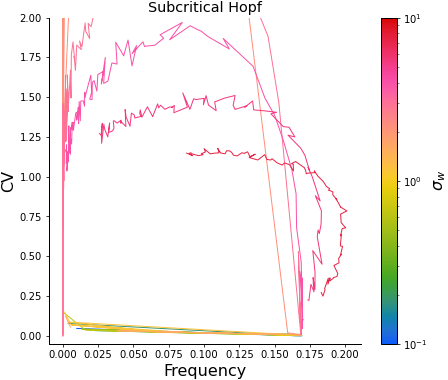

In [91]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
    ax1.plot(f[row,:], covs[row,:], color=cmap(row/len(sigmas)))

#     ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("Subcritical Hopf")

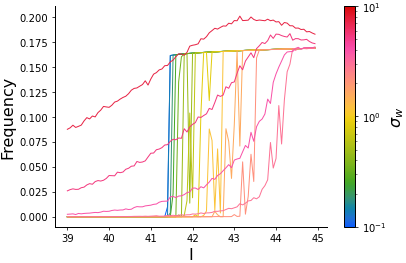

In [75]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, f[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
# ax1.set_ylim(-0.05, 0.7)
ax1.set_xlabel("I")
ax1.set_ylabel("Frequency")
plt.tight_layout()

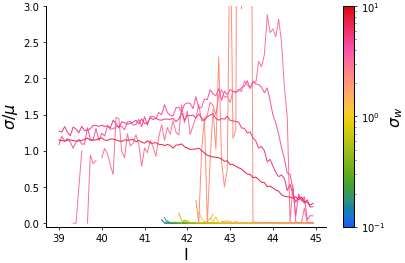

In [77]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, covs[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
ax1.set_ylim(-0.05, 3)
ax1.set_xlabel("I")
ax1.set_ylabel(r"$\sigma/\mu$")
plt.tight_layout()

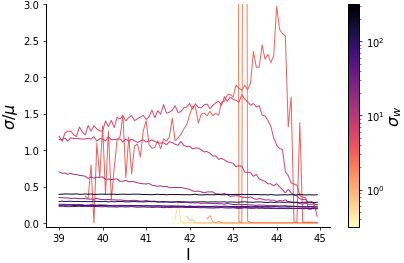

In [96]:
fig1, ax1 = plt.subplots(figsize=(6,4))
for row in range(len(sigmas)):
    ax1.plot(Is, covs[row,:], c=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap="magma_r"), label=r"$\sigma_w$")

# ax1.set_xlim(0.6, 1.25)
ax1.set_ylim(-0.05, 3)
ax1.set_xlabel("I")
ax1.set_ylabel(r"$\sigma/\mu$")
plt.tight_layout()

In [131]:
bifurcation = "fitzhugh"
datadir = os.path.join(rootdir, bifurcation)
sigmas = set([])
Is = set([])
for f in os.listdir(datadir):
    res = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, f)
    if res is not None:
        sigmas.add(res['sigma'])
        Is.add(res['I'])
sigmas = np.sort(np.array(list(sigmas)))
Is = np.sort(np.array(list(Is)))
isi_mu = np.zeros((len(sigmas),len(Is)))
isi_std = np.zeros((len(sigmas),len(Is)))
f = np.zeros((len(sigmas),len(Is)))
for file in os.listdir(datadir):
    params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, file)
    if params is not None:
        try:
            res = np.load(os.path.join(datadir, file))
        except Exception as e:
            print(file)
            continue
        row = np.argwhere(sigmas==params['sigma'])[0][0]
        col = np.argwhere(Is==params['I'])[0][0]
        isi_mu[row, col] = res['isi_mu']
        isi_std[row, col] = res['isi_std']
        f[row, col] = res['f']
np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)

/tmp/ipykernel_29373/883648265.py:28: RuntimeWarning: invalid value encountered in true_divide
  np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)


In [132]:
bifurcation = "fitzhugh"
datadir = os.path.join(rootdir, bifurcation)
results = np.load(os.path.join(datadir, "results.npz"))
Is = results["Is"]
sigmas = results["sigmas"]
f = results["freq"]
covs = results["isi_cv"]

Text(0.5, 1.0, 'Fitzhugh')

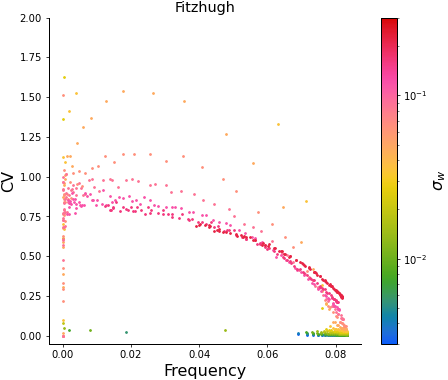

In [136]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
    ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("Fitzhugh")

In [6]:
bifurcation = "subcritical_hopf2"
datadir = os.path.join(rootdir, bifurcation)
sigmas = set([])
Is = set([])
for f in os.listdir(datadir):
    res = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % "subcritical_hopf", f)
    if res is not None:
        sigmas.add(res['sigma'])
        Is.add(res['I'])
sigmas = np.sort(np.array(list(sigmas)))
Is = np.sort(np.array(list(Is)))
isi_mu = np.zeros((len(sigmas),len(Is)))
isi_std = np.zeros((len(sigmas),len(Is)))
f = np.zeros((len(sigmas),len(Is)))
for file in os.listdir(datadir):
    params = parse("%s_sigma_{sigma:f}_I_{I:f}.npz" % bifurcation, file)
    if params is not None:
        try:
            res = np.load(os.path.join(datadir, file))
        except Exception as e:
            print(file)
            continue
        row = np.argwhere(sigmas==params['sigma'])[0][0]
        col = np.argwhere(Is==params['I'])[0][0]
        isi_mu[row, col] = res['isi_mu']
        isi_std[row, col] = res['isi_std']
        f[row, col] = res['f']
np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)

/tmp/ipykernel_29512/510327402.py:28: RuntimeWarning: invalid value encountered in true_divide
  np.savez(os.path.join(datadir, "results.npz"), sigmas=sigmas, Is=Is, freq=f, isi_cv=isi_std/isi_mu)


In [9]:
bifurcation = "subcritical_hopf2"
datadir = os.path.join(rootdir, bifurcation)
results = np.load(os.path.join(datadir, "results.npz"))
Is = results["Is"]
sigmas = results["sigmas"]
f = results["freq"]
covs = results["isi_cv"]

In [14]:
covs[np.isfinite(covs)]

array([], dtype=float64)

Text(0.5, 1.0, 'Subcritical Hopf')

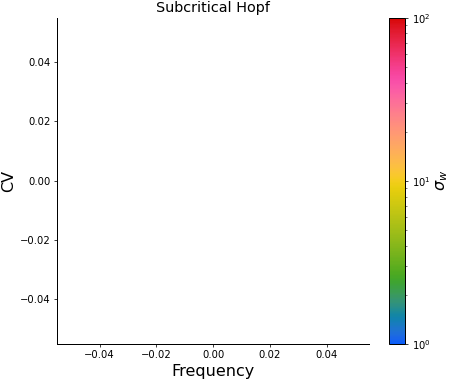

In [11]:
fig1, ax1 = plt.subplots(figsize=(7,6))
# ax1.set_ylim(-0.05, 2)
for row in range(len(sigmas)):
    ax1.plot(f[row,:], covs[row,:], color=cmap(row/len(sigmas)))

#     ax1.scatter(f[row,:], covs[row,:], s=3, color=cmap(row/len(sigmas)))
fig1.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=sigmas[0], vmax=sigmas[-1]), cmap=cm_string), label=r"$\sigma_w$")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("CV")
ax1.set_title("Subcritical Hopf")